In [14]:
import os
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'
if not os.path.isdir(drive_path):
    drive_path = '/media/alihamodi/Brain2019/allen-brain-observatory/visual-coding-2p/'

import warnings; warnings.simplefilter('ignore');
from utils.polarplot import *
from utils.polardata import *
from utils.data_wrappers import *
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

import warnings;
warnings.simplefilter('ignore');
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

# Signal correlation across different ts smoothings

In [15]:
eid = 501836392
c1 = 517420102
c2 = 517421141

In [16]:
data_set = boc.get_ophys_experiment_data(eid)
events = boc.get_ophys_experiment_events(ophys_experiment_id=eid)
loc_x, loc_y = get_cell_locations(data_set)
d = get_cell_distance(data_set, loc_x, loc_y, c1, c2)
cidxs = data_set.get_cell_specimen_indices([c1, c2])
stim_table = data_set.get_stimulus_table('natural_movie_one') 

Using events. Distance = 40.1280113209426. Correlation = 0.23535621108831592


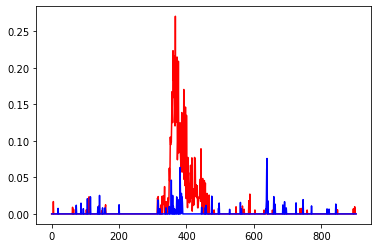

In [17]:
# Plot the events
cidx1 = cidxs[0]
cidx2 = cidxs[1]
events1 = events[cidx1,:]
events2 = events[cidx2,:]

totalts1, totalts2 = get_avg_tses(stim_table, events1, events2)
corr, p_value = pearsonr(totalts1, totalts2)
print ("Using events. Distance = {}. Correlation = {}".format(d, corr))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(totalts1, color='red')
ax.plot(totalts2, color='blue')

Using dff. Distance = 40.1280113209426. Correlation = 0.34825521510813306


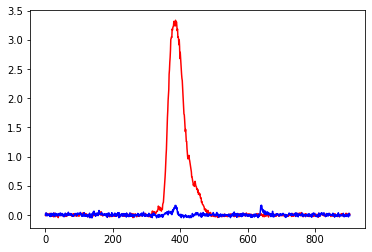

In [18]:
# Plot the dff
timestamps, dff = data_set.get_dff_traces(cell_specimen_ids=[c1])
events1 = dff[0,:]
timestamps, dff = data_set.get_dff_traces(cell_specimen_ids=[c2])
events2 = dff[0,:]

totalts1, totalts2 = get_avg_tses(stim_table, events1, events2)
corr, p_value = pearsonr(totalts1, totalts2)
print ("Using dff. Distance = {}. Correlation = {}".format(d, corr))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(totalts1, color='red')
ax.plot(totalts2, color='blue')

In [24]:
def get_smoothed_avg(ts, frame_window):
    """
    Return a smoothed ts by replacing each data point w/ the avg given the frame window.
    """
    cur_sum = np.sum(ts[0:frame_window])
    new_ts = [cur_sum / frame_window]
    for frame in range(len(ts)):
        new_ts.append(cur_sum / frame_window)
        cur_sum -= ts[frame]
        next_ind = frame + frame_window + 1
        if next_ind >= len(ts):
            # Too lazy to compute the last few frames. we're using window = 3 frames anyway.
            break
        cur_sum += ts[next_ind]
    return new_ts

Using events. Distance = 40.1280113209426. Correlation = 0.34733850450070014


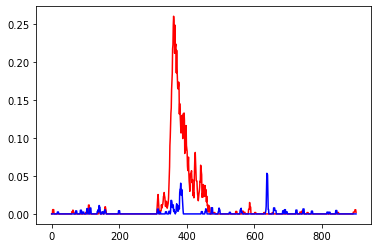

In [29]:
# Plot the smoothed events
cidx1 = cidxs[0]
cidx2 = cidxs[1]
events1 = events[cidx1,:]
events2 = events[cidx2,:]

totalts1, totalts2 = get_avg_tses(stim_table, events1, events2)
totalts1 = get_smoothed_avg(totalts1, 3)
totalts2 = get_smoothed_avg(totalts2, 3)
corr, p_value = pearsonr(totalts1, totalts2)
print ("Using events. Distance = {}. Correlation = {}".format(d, corr))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(totalts1, color='red')
ax.plot(totalts2, color='blue')